In [2]:
#!/usr/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle
import sys
import numpy as np
sys.path.append("../tools/")


from feature_format import featureFormat
from feature_format import targetFeatureSplit

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

type(enron_data)


dict

In [3]:
len(enron_data)

146

In [17]:
len(enron_data[enron_data.keys()[1]].keys())

21

In [18]:
enron_data[enron_data.keys()[1]].keys()

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'poi',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'email_address',
 'from_poi_to_this_person']

In [35]:
feat = enron_data[enron_data.keys()[1]].keys()
for key in feat:
    count=0
    for each in enron_data:
        if enron_data[each][key]=='NaN':
            count+=1
    print key, count 
len(feat)        
len(enron_data)

to_messages 59
deferral_payments 107
expenses 51
income_fraction 0
poi 0
deferred_income 97
email_address 34
long_term_incentive 80
fraction_shared_receipt_poi 0
restricted_stock_deferred 128
shared_receipt_with_poi 59
loan_advances 142
from_messages 59
other 53
director_fees 129
bonus 64
total_stock_value 20
from_poi_to_this_person 59
from_this_person_to_poi 59
restricted_stock 36
salary 51
total_payments 21
exercised_stock_options 44


145

Removing Outliers 

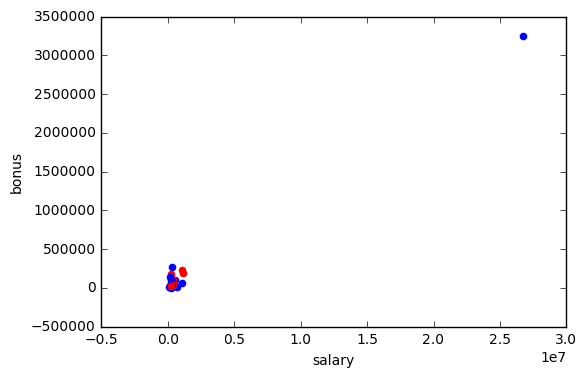

In [22]:
import matplotlib.pyplot as plt 
def plotfeatures(a,b):
    for key in enron_data:
        if (enron_data[key][a]!= 'NaN') & (enron_data[key][b]!= 'NaN'):
            if enron_data[key]['poi']:
                plt.scatter(enron_data[key][a],enron_data[key][b]/30.,color='r')
            else:
                plt.scatter(enron_data[key][a],enron_data[key][b]/30.,color='b')

    plt.xlabel(a)
    plt.ylabel(b)
    #plt.suptitle('After removing outliers',fontsize=15)
    #label=str(a+"_"+b+"1")
    #plt.savefig(label)
    plt.show()
    
plotfeatures("salary","bonus")    

In [23]:
enron_data.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

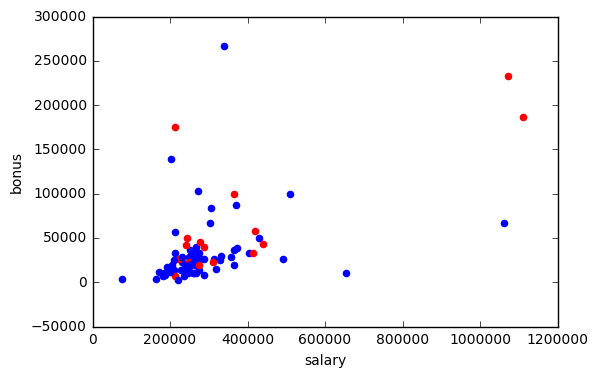

In [27]:
plotfeatures("salary","bonus") 

### Feature Engineering 

Decision tree algorithm is used in feature selection. Feature scaling was not performed as the algorithm doesn’t require it. The top four features were selected for use in algorithm selection. A new feature was also engineered called ‘income_fraction’ which equals (–deferred_income/1000+expenses)/shared_receipt_with_poi. Several features were attempted and plotted to visually interpret if they achieve separation between poi and non-poi. Income_fraction seemed to achieve a fair bit of homogenous clustering of poi compared to non poi when plotted, as seen below. 

In [ ]:
for each in enron_data.keys():
    if (enron_data[each]['deferred_income']!='NaN')&(enron_data[each]['expenses']!='NaN')&(enron_data[each]['shared_receipt_with_poi']!='NaN'):
        enron_data[each]['income_fraction'] = (enron_data[each]['deferred_income']*-0.001+enron_data[each]['expenses'])/float(enron_data[each]['shared_receipt_with_poi'])
    else:
        enron_data[each]['income_fraction'] = 0

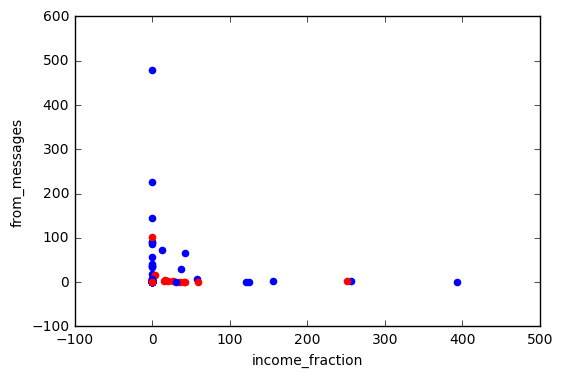

In [26]:
plotfeatures('income_fraction','from_messages')

In [29]:
for each in enron_data.keys():
    if (enron_data[each]['from_messages']!='NaN')&(enron_data[each]['to_messages']!='NaN')&(enron_data[each]['shared_receipt_with_poi']!='NaN'):
        enron_data[each]['fraction_shared_receipt_poi'] = (enron_data[each]['from_messages']+enron_data[each]['to_messages'])/float(enron_data[each]['shared_receipt_with_poi'])
    else:
        enron_data[each]['fraction_shared_receipt_poi'] = 0

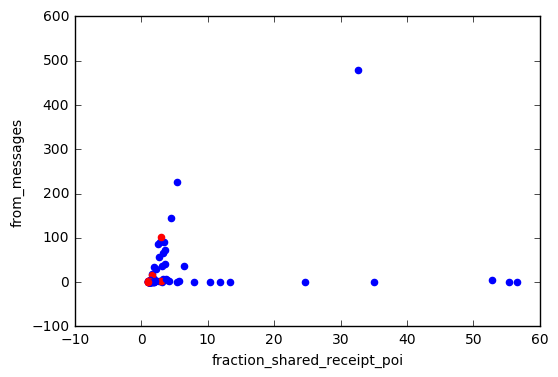

In [34]:
plotfeatures('fraction_shared_receipt_poi','from_messages')

In [41]:
for each in enron_data.keys():
    if (enron_data[each]['from_messages']!='NaN')&(enron_data[each]['to_messages']!='NaN')&(enron_data[each]['from_poi_to_this_person']!='NaN')&(enron_data[each]['from_this_person_to_poi']!='NaN'):
        enron_data[each]['fraction_total_messages_poi'] = (enron_data[each]['from_poi_to_this_person']+enron_data[each]['from_this_person_to_poi'])/float(enron_data[each]['from_messages']+enron_data[each]['to_messages'])
    else:
        enron_data[each]['fraction_total_messages_poi'] = 0 

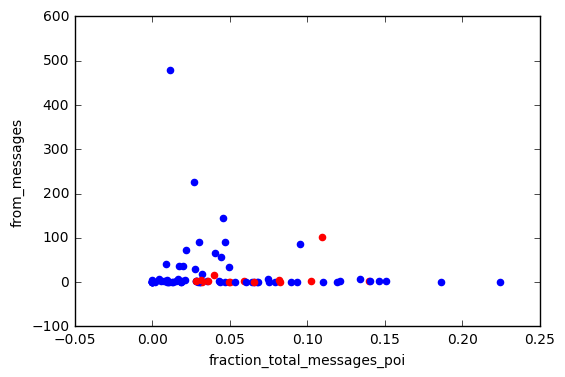

In [42]:
plotfeatures('fraction_total_messages_poi','from_messages')

### Feature Selection 

In [50]:
 
features_list = ['poi','to_messages','deferral_payments','expenses','deferred_income','long_term_incentive',
     'shared_receipt_with_poi','loan_advances','from_messages','director_fees',
'bonus','total_stock_value','from_poi_to_this_person','from_this_person_to_poi','fraction_total_messages_poi',
'restricted_stock','salary','total_payments','exercised_stock_options','income_fraction']   

data_ = featureFormat(enron_data, features_list)

labels, features = targetFeatureSplit(data_)
from sklearn import cross_validation
#features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier as DTC
fea = DTC(min_samples_split=2)
fea.fit(features,labels)
print fea.score(features,labels)
export_list=[]
for each in np.argsort(fea.feature_importances_)[::-1]:
    print np.array(features_list[1:])[each],fea.feature_importances_[each]
    if fea.feature_importances_[each]>0:
        export_list.append(np.array(features_list[1:])[each])
print export_list 

1.0
expenses 0.272108843537
income_fraction 0.254992319508
exercised_stock_options 0.123314558798
fraction_total_messages_poi 0.10582010582
bonus 0.0714285714286
from_this_person_to_poi 0.0617964903679
restricted_stock 0.047619047619
total_stock_value 0.031746031746
deferred_income 0.031174031174
from_poi_to_this_person 0.0
salary 0.0
director_fees 0.0
from_messages 0.0
loan_advances 0.0
shared_receipt_with_poi 0.0
long_term_incentive 0.0
total_payments 0.0
deferral_payments 0.0
to_messages 0.0
['expenses', 'income_fraction', 'exercised_stock_options', 'fraction_total_messages_poi', 'bonus', 'from_this_person_to_poi', 'restricted_stock', 'total_stock_value', 'deferred_income']


In [87]:
data = featureFormat(enron_data, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)
from sklearn import cross_validation
from time import time 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

#features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)
t0 = time()

clf = GaussianNB()
clf.fit(features, labels)
pred = clf.predict(features)
accuracy = accuracy_score(pred,labels)

print accuracy
print precision_score(labels, pred)
print recall_score(labels, pred)
print "NB algorithm time:", round(time()-t0, 3), "s"

0.854166666667
0.4
0.333333333333
NB algorithm time: 0.004 s


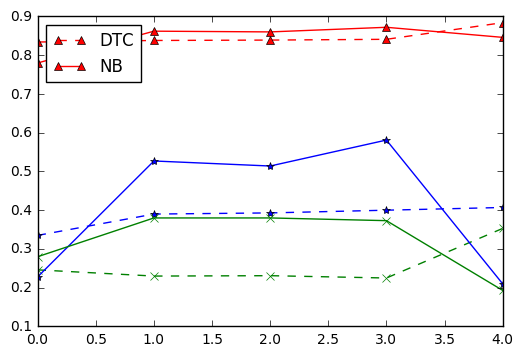

In [99]:
#The accuracy, precision and recall values are calculated using tester.py iteratively for each of the feature list using both
#Decision Tree classifier and Naive Bayes classifer 
# the set of features which has the optimal recall and precision score was selected for final tuning for each algorithm

accuracydtc= [0.8340,0.838,0.839,0.841,0.884]
precisiondtc = [0.335,0.39,0.393,0.40,0.407]
recalldtc = [0.246,0.23,0.231,0.225,0.353]
accuracynb = [0.78,0.862,0.8601,0.872,0.846]
precisionnb=[0.228,0.527,0.514,0.581,0.210]
recallnb=[0.28,0.38,0.38,0.373,0.193]
featurelist = ['list1','list2','list3','list4','list5']
plt.plot(accuracydtc,marker='^', color='r',label='DTC',linestyle="--")
plt.plot(precisiondtc, marker='*', color='b',linestyle="--")
plt.plot(recalldtc, marker='x', color='g',linestyle="--")
plt.plot(accuracynb, marker='^',color='r',label='NB')
plt.plot(precisionnb, marker='*',color='b')
plt.plot(recallnb, marker='x',color='g')
plt.legend(loc='upper left')
plt.show()

### Algorithm Tuning 

Naïve Bayes algorithm was attempted with default parameters to check the accuracy, which resulted in 0.84 accuracy. Decision Tree classifier returned an accuracy of 0.77 prior to tuning the parameters and Support Vector Machine classifier along with feature transformation using PCA returned an accuracy of 0.73.   

### Naive Bayes 

In [98]:
feature_list = ['poi','exercised_stock_options','fraction_total_messages_poi','deferred_income','from_this_person_to_poi','income_fraction']
data = featureFormat(enron_data, feature_list)
labels, features = targetFeatureSplit(data)
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(labels_test,pred)

print accuracy
print precision_score(labels_test, pred)
print recall_score(labels_test, pred)
print "NB algorithm time:", round(time()-t0, 3), "s"

0.857142857143
0.0
0.0
NB algorithm time: 0.003 s


### Decision Tree Classifier 

In [97]:
features_list = ['poi','fraction_total_messages_poi','deferred_income','from_this_person_to_poi','income_fraction']
data = featureFormat(enron_data, features_list)
from sklearn.tree import DecisionTreeClassifier as DTC

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import KFold
kf=KFold(len(labels),2)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]
t0 = time()

clf = DTC(min_samples_split=3)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print accuracy_score(labels_test, pred)
print precision_score(labels_test, pred)
print recall_score(labels_test, pred)

0.78
0.375
0.333333333333


Parameter tuning of algorithms gives the optimal conditions to set the algorithm so we can get the best accuracy. This ensures that the dataset you have is well understood by the algorithm that it is being modeled on. Although choosing the right algorithm is up to us once you decide on which algorithm to use, parameter tuning is essential so we are using the right conditions to achieve the optimal accuracy. The final algorithm that was chosen here, Naïve Bayes classifier, did not have any parameters to tune. The accuracy, precision and recall achieved are 0.87, 0.581 and 0.375. Decision Tree was tuned using GridSearchCV on parameters max_samples_split and max_depth and min_samples_leaf. To optimize on precision and recall instead of accuracy scores, manual tuning was performed to arrive at optimal parameters [max_samples_split:2,max_depth:3,min_samples_leaf:2]. Support Vector Machine and PCA were also attempted to find the optimal parameters via GridSearchCV but since algorithm did not return any true positives or true negatives. Considering the number of features (18) and the size of the dataset available after removing NA’s, SVM is not expected to perform well, which is what was observed.    

21

20